# Loading data into the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Data Analysis and preprocessing

In [ ]:
pd.to_datetime(df.Date).dt.year

,Date
0,2008
1,2008
2,2008
3,2008
4,2008
...,...
145455,2017
145456,2017
145457,2017
145458,2017


<Axes: xlabel='Date', ylabel='count'>

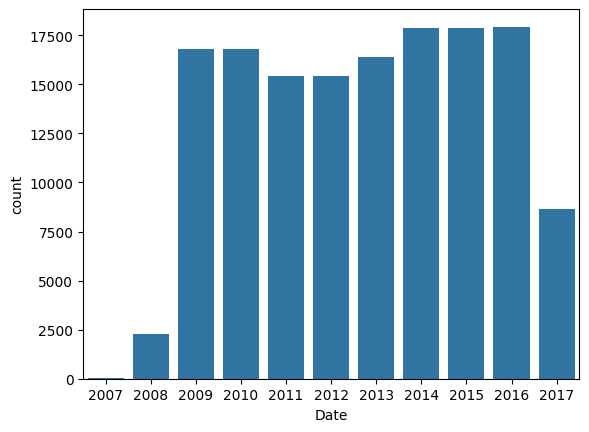

In [ ]:
year=pd.to_datetime(df.Date).dt.year
sns.countplot(x=year)

In [ ]:
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


# Train test split

In [ ]:
inputs=list(train_df.columns)[1:-1]
targets='RainTomorrow'

In [ ]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[targets]
val_targets = pd.read_parquet('val_targets.parquet')[targets]
test_targets = pd.read_parquet('test_targets.parquet')[targets]


In [ ]:
cat_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
X_train = train_inputs.drop(columns=cat_cols)
X_val = val_inputs.drop(columns=cat_cols)
X_test = test_inputs.drop(columns=cat_cols)

# Model Training

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42).fit(X_train,train_targets)

CPU times: user 3.73 s, sys: 62.9 ms, total: 3.79 s
Wall time: 3.82 s


In [ ]:
model.score(X_train,train_targets)

0.9999795893374699

In [ ]:
model.score(X_val,val_targets)

0.7925566153666102

In [ ]:
val_targets.value_counts() / len(val_targets)

,count
RainTomorrow,
No,0.790626
Yes,0.209374


[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

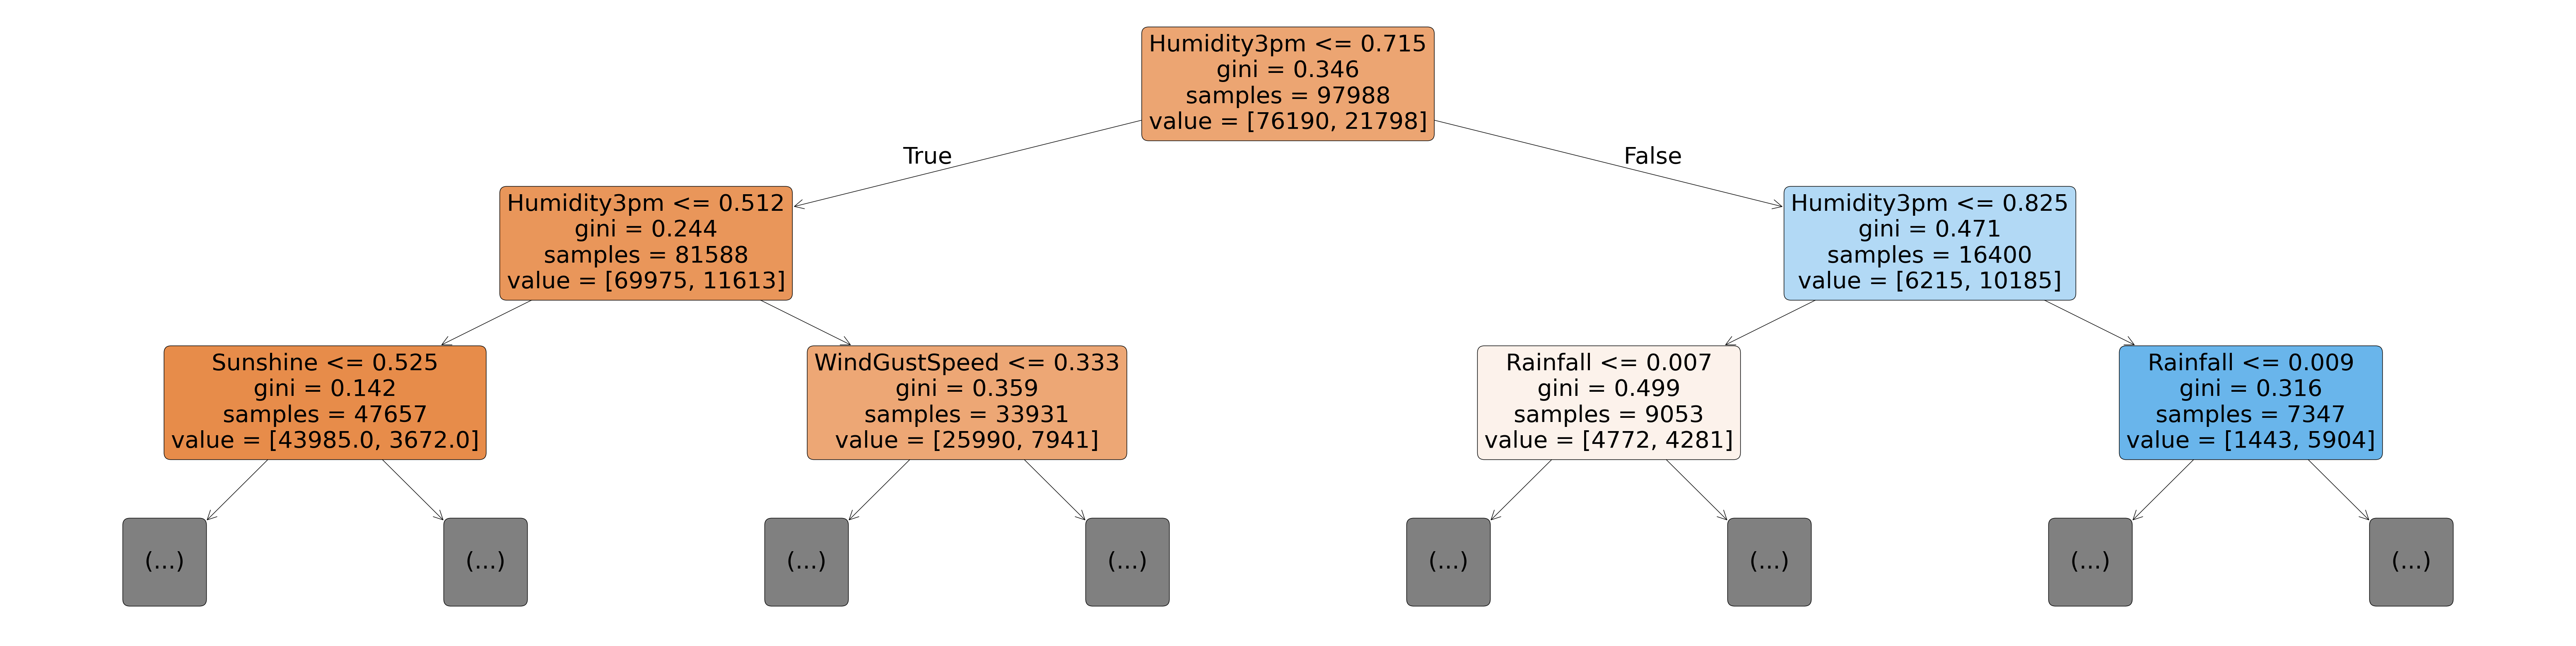

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model,max_depth=2,filled=True,rounded= True,feature_names=X_train.columns )

In [ ]:
model.tree_.max_depth

49

In [ ]:
tree_text = export_text(model,max_depth=10,feature_names=X_train.columns )
print(tree_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns ,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.280112
11,Pressure3pm,0.061334
5,WindGustSpeed,0.060042
4,Sunshine,0.047265
2,Rainfall,0.044233
8,Humidity9am,0.040101
10,Pressure9am,0.037972
0,MinTemp,0.036659
14,Temp9am,0.035118
15,Temp3pm,0.033763


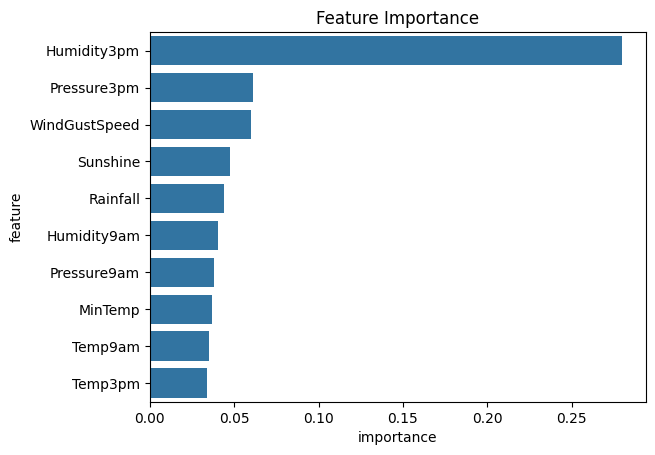

In [ ]:
sns.barplot(importance_df.head(10),y='feature',x='importance')
plt.title("Feature Importance")
plt.show()

In [ ]:
def max_depth(md):
  model = DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(X_train,train_targets)
  train_err = 1- model.score(X_train,train_targets)
  val_err = 1- model.score(X_val,val_targets)
  return {'Max_Depth': md,'Train Error':train_err,'Val Error':val_err}
error_df = pd.DataFrame([max_depth(md) for md in range(1,21)])

In [ ]:
error_df

,Max_Depth,Train Error,Val Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155890
6,7,0.149059,0.154661
7,8,0.144814,0.154076
8,9,0.139425,0.154544
9,10,0.131802,0.155539


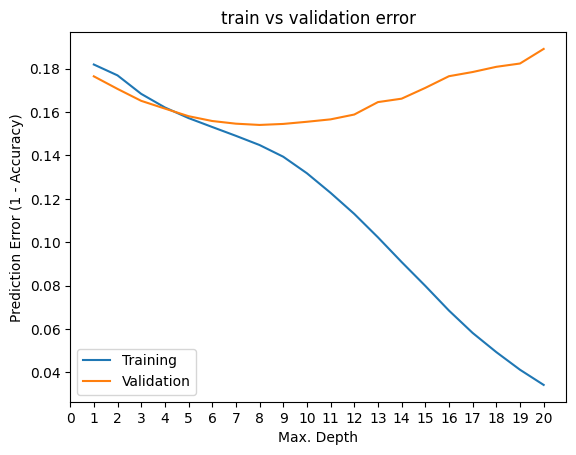

In [ ]:
plt.title('train vs validation error')
plt.plot(error_df['Max_Depth'], error_df['Train Error'])
plt.plot(error_df['Max_Depth'], error_df['Val Error'])
plt.xticks(range(0,21))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=12,max_leaf_nodes=128,random_state=42)
model.fit(X_train,train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.852696248520227, 0.8471531394464276)

In [ ]:
model.min_samples_split

2

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,random_state=42)
model.fit(X_train ,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train ,train_targets)

0.9999795893374699

In [ ]:
model.score(X_val ,val_targets)

0.8572180935104453

In [ ]:
importance_df = pd.DataFrame({
    'feature' : X_val.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

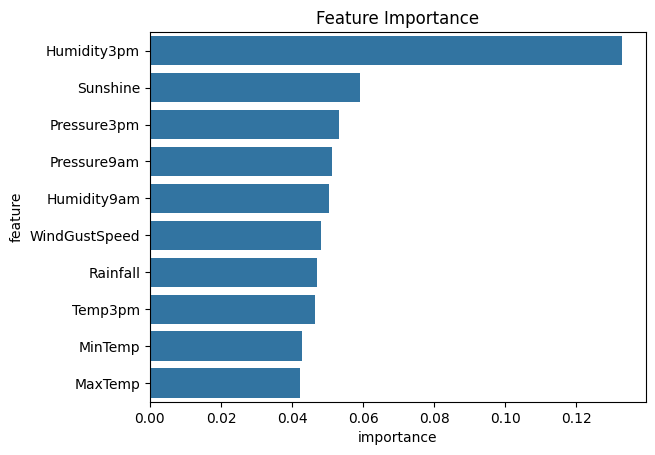

In [ ]:
plt.title('Feature Importance')
sns.barplot(importance_df.head(10),x= 'importance',y='feature')

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,random_state=42)
model.fit(X_train ,train_targets)
model.score(X_train ,train_targets),model.score(X_val ,val_targets)

CPU times: user 43.3 s, sys: 336 ms, total: 43.6 s
Wall time: 26.5 s


(0.9999795893374699, 0.8572180935104453)

In [ ]:
base_acc= model.score(X_train ,train_targets),model.score(X_val ,val_targets)

In [ ]:
def try_params(**params):
  model = RandomForestClassifier(n_jobs=-1,random_state=42,**params).fit(X_train ,train_targets)
  return model.score(X_train ,train_targets),model.score(X_val ,val_targets)

In [ ]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_Unknown', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=118)

In [ ]:
try_params(max_features='sqrt')

(0.9999795893374699, 0.8572180935104453)

In [ ]:
try_params(max_features=40)

(0.9999693840062048, 0.8597343320264498)

In [ ]:
base_acc

(0.9999795893374699, 0.8572180935104453)

In [ ]:
num_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
cat_cols = train_inputs.select_dtypes('object').columns.to_list()
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=500,max_features=7,max_depth=30,class_weight={'No': 1, 'Yes': 1.5}).fit(X_train,train_targets)

In [ ]:
model.score(X_val,val_targets)

0.8571595763356545